# Nilearn first steps
Here, we are taking our first steps with nilearn by using a toy dataset to extract roi-wise time series and then compute a correlation matrix.

We got some of the code from [here](https://nilearn.github.io/stable/auto_examples/03_connectivity/plot_signal_extraction.html#sphx-glr-auto-examples-03-connectivity-plot-signal-extraction-py)

## Loading the dataset and atlas

In [1]:
from nilearn import datasets
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# getting an atlas
dataset = datasets.fetch_atlas_harvard_oxford("cort-maxprob-thr25-2mm")
atlas_filename = dataset.maps
labels = dataset.labels

print(f"Atlas ROIs are located in nifti image (4D) at: {atlas_filename}")

# loading 10 subjects of brain development fMRI data
data = datasets.fetch_development_fmri(n_subjects=10, reduce_confounds=True)
# getting paths to their fmri files
fmri_filenames = data.func
# getting paths tp their confounds files
reduced_confounds = data.confounds  # This is a preselected set of confounds
len(labels) # this is 49, 48 rgeions and one background part

Atlas ROIs are located in nifti image (4D) at: 
<class 'nibabel.nifti1.Nifti1Image'>
data shape (91, 109, 91)
affine:
[[   2.    0.    0.  -90.]
 [   0.    2.    0. -126.]
 [   0.    0.    2.  -72.]
 [   0.    0.    0.    1.]]
metadata:
<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b''
dim_info        : 0
dim             : [  3  91 109  91   1   1   1   1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 2. 2. 2. 1. 1. 1. 1.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 0
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b''
aux_file        : b''
qform

49

In [2]:
# checking our confound table
confs = pd.read_csv(reduced_confounds[3], sep = '\t')
confs.columns

Index(['trans_x', 'trans_y', 'trans_z', 'rot_x', 'rot_y', 'rot_z',
       'framewise_displacement', 'a_comp_cor_00', 'a_comp_cor_01',
       'a_comp_cor_02', 'a_comp_cor_03', 'a_comp_cor_04', 'a_comp_cor_05',
       'csf', 'white_matter'],
      dtype='object')

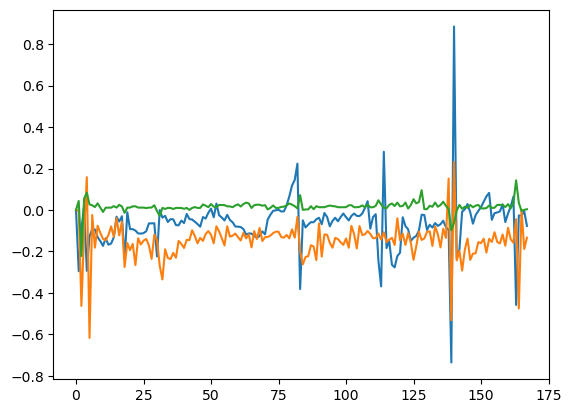

In [3]:
# plotting some motion confounds
plt.plot(confs.trans_z)
plt.plot(confs.trans_y)
plt.plot(confs.trans_x)

# plt.plot(confs.framewise_displacement)

## Short interlude: playground for lists

In [4]:
# creating an empty list
our_list = []
# filling it with Pizza and Drinks by using append repeatedly
# TODO make this nicer by using a for loop
our_list.append('Pizza')
our_list.append('Drinks')
our_list.append('Pizza')
our_list.append('Drinks')
our_list.append('Pizza')
our_list.append('Drinks')
our_list.append('Pizza')
our_list.append('Drinks')
print(our_list)

# we can also create this list using a loop
our_list = []
for i in range(4):
    our_list.append('Pizza')
    our_list.append('Drinks')
print(our_list)

    
# or a nested loop
our_list = []
for i in range(4):
    for item in ['Pizza', 'Drinks']:
        our_list.append(item)
print(our_list)


['Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks']
['Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks']
['Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks', 'Pizza', 'Drinks']


In [5]:
## these are doing the same thing
i = 0
for order in our_list:
    print(i, order)
    i +=1

for i, order in enumerate(our_list):
    print(i, order)

0 Pizza
1 Drinks
2 Pizza
3 Drinks
4 Pizza
5 Drinks
6 Pizza
7 Drinks
0 Pizza
1 Drinks
2 Pizza
3 Drinks
4 Pizza
5 Drinks
6 Pizza
7 Drinks


## Using the Masker object to extract signals

In [110]:
from nilearn.maskers import NiftiLabelsMasker

# initializing a Masker object. It needs an atlas to be initialized
masker = NiftiLabelsMasker(
    labels_img=atlas_filename,
    memory="nilearn_cache",
    verbose=0, # the more verbose, the more printouts this will generate
)

# Here we go from nifti files to the signal time series in a numpy
# array. Note how we give confounds to be regressed out during signal
# extraction

# we can store time series in a list
time_series = []

# or initialize a numpy array for results
time_series = np.zeros((10, 168, 48))

# we loop over fmri_filenames and reduced_confounds and extract cleaned signals using masker.fit_transform
# according to the atlas we gave the masker object above
for i, (file_name, confound) in enumerate(zip(fmri_filenames, reduced_confounds)):
        if type(time_series) == list:
            # if time_series is a list, we want to append the results to it
            time_series.append(masker.fit_transform(file_name, confounds=confound))
        else:
            # otherwise, we expect an array that we can index
            time_series[i] = masker.fit_transform(file_name, confounds=confound)

# time_series

In [111]:
# checking the shape of our extracted timeseries
# for array:
time_series.shape
# for list:
# time_series[0].shape

(10, 168, 48)

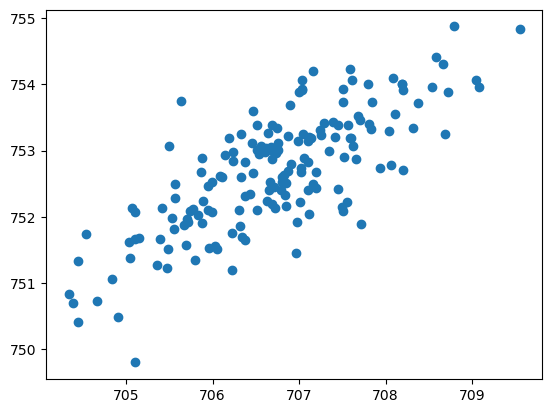

In [112]:
# correlating time series from two neighbouring regions
plt.scatter(time_series[0].T[5], time_series[0].T[4])

## Producing and plotting a connectivity matrix using ConnectivityMeasure

In [113]:
time_series[0].shape

(168, 48)

In [114]:
correlation_measure.fit_transform([time_series[0]]).shape

(1, 48, 48)

(48, 48)


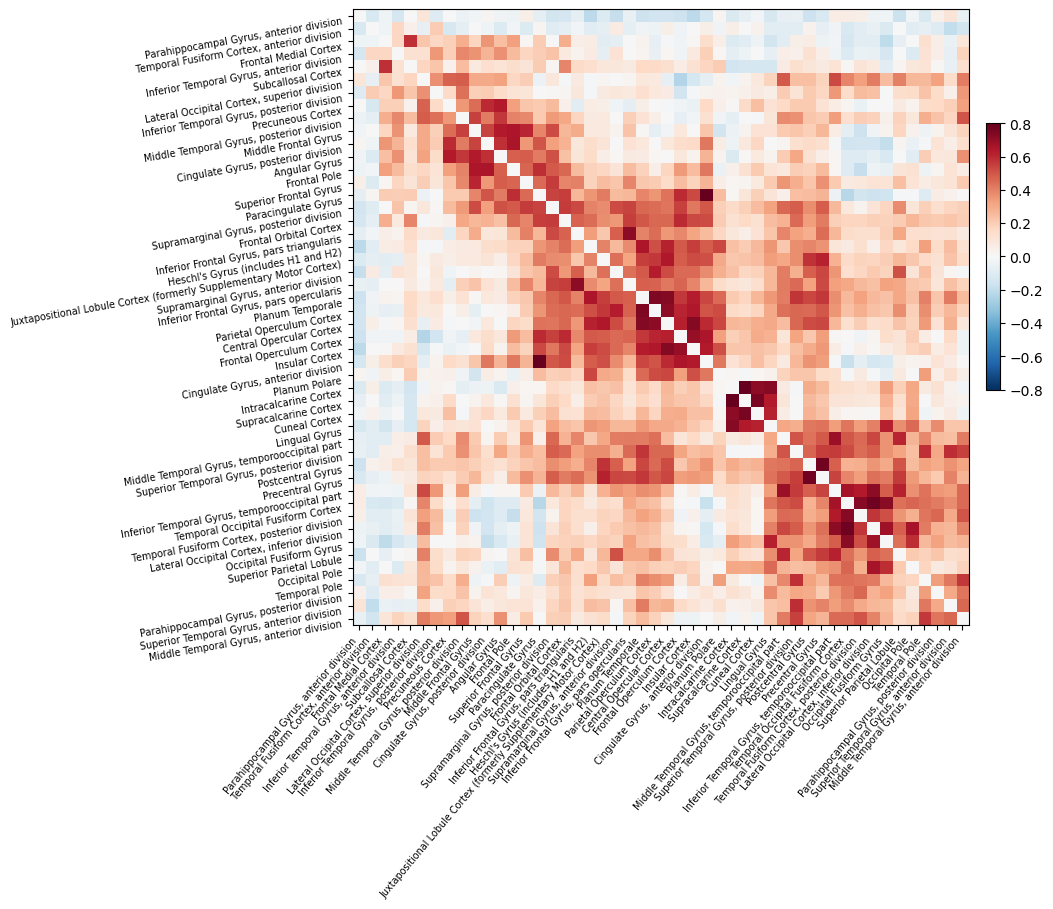

In [115]:
from nilearn.connectome import ConnectivityMeasure

# intializing the ConnectivityMeasure object
correlation_measure = ConnectivityMeasure(
    kind="correlation",
#     standardize="zscore_sample",
)

# get the correlation matrix out
correlation_matrix = correlation_measure.fit_transform([time_series[0]])[0]
print(correlation_matrix.shape)
# Plot the correlation matrix
import numpy as np
from nilearn import plotting

# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)
# The labels we have start with the background (0), hence we skip the
# first label
# matrices are ordered for block-like representation
plotting.plot_matrix(
    correlation_matrix,
    figure=(10, 8),
    labels=labels[1:],
    vmax=0.8,
    vmin=-0.8,
#     title="Confounds",
    reorder=True,
)

In [116]:
# checking shapes again
time_series.shape
correlation_matrix.shape

(48, 48)

## Visualizing connectivity
Here, we visualze connectivity matrices with the help of a slider

In [54]:
import ipywidgets as widgets  # interactive display

In [117]:
# correlation_matrix will contain 10 correlation matrices 
correlation_matrix = correlation_measure.fit_transform(time_series)

# we can scroll through our 10 correlation matrices with a slider determining the index i
@widgets.interact(i = widgets.IntSlider(value=0, min=0, max=9, step=1))
def plot(i):
# for i in range(correlation_matrix.shape[0]):
    plotting.plot_matrix(
        correlation_matrix[i],
        figure=(10, 8),
        labels=labels[1:],
        vmax=0.8,
        vmin=-0.8,
        reorder=False, # having this on false makes sure that regions are ordered the same for every sub
    )

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

After noting that our participant 8 looks weird, we want to assess its contribution to the mean by plotting the mean with one participant kept out:

In [119]:
correlation_matrix = correlation_measure.fit_transform(time_series)

@widgets.interact(i = widgets.IntSlider(value=0, min=0, max=9, step=1))
def plot(i):
# for i in range(correlation_matrix.shape[0]):
    # this mask will be used to select our participants to compute the mean from
    mask = [True]*10
    mask[i] = False
    plotting.plot_matrix(
        correlation_matrix[mask].mean(axis = 0), # computing the mean over participants selected by the mask
        figure=(10, 8),
        labels=labels[1:],
        vmax=0.8,
        vmin=-0.8,
    #     title="Confounds",
        reorder=False,
    )

interactive(children=(IntSlider(value=0, description='i', max=9), Output()), _dom_classes=('widget-interact',)…

In [120]:
print(correlation_matrix.shape)
# depending on the axis parameter in the .mean() funciton, we can decide what to average over
# axis = 0 in this case makes us average across participants, as evident by checking the shape
correlation_matrix.mean(axis = 0).shape

(10, 48, 48)


(48, 48)

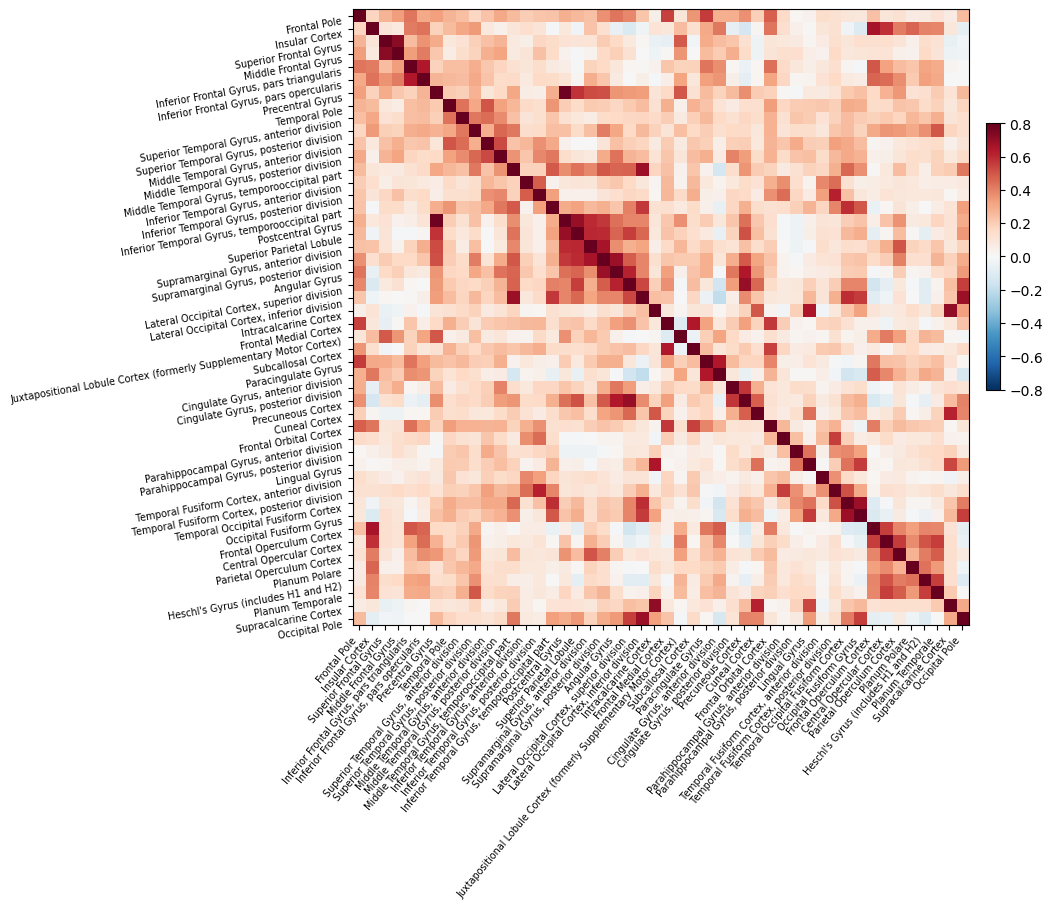

In [98]:
# plotting the mean correlation matrix across our 10 participants
correlation_matrix = correlation_measure.fit_transform(time_series)

plotting.plot_matrix(
    correlation_matrix.mean(axis=0),
    figure=(10, 8),
    labels=labels[1:],
    vmax=0.8,
    vmin=-0.8,
#     title="Confounds",
    reorder=False,
)

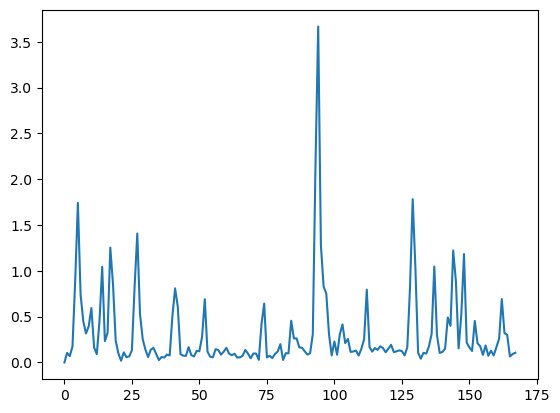

In [81]:
# looking at different time series to find out what was up with participant 8
# plt.plot(time_series[8].T[40])
# plt.plot(time_series[8])
plt.plot(confs_pp8.framewise_displacement)

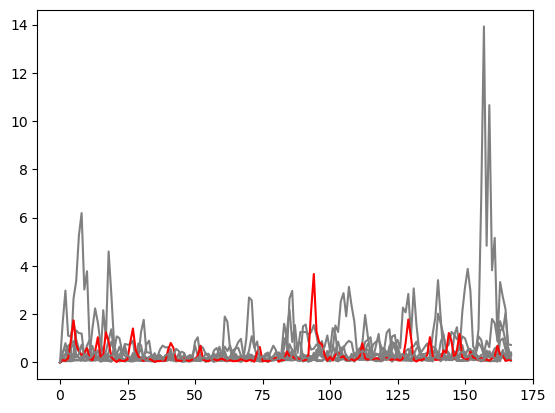

In [88]:
for i in range(len(reduced_confounds)):
#     print(i)
    confs = pd.read_csv(reduced_confounds[i], sep = '\t')
    
    if i == 8:
        plt.plot(confs.framewise_displacement, color = 'red')
    
    else:
        plt.plot(confs.framewise_displacement, color = 'grey')
    

In [78]:
confs_pp8

,trans_x,trans_y,trans_z,rot_x,rot_y,rot_z,framewise_displacement,a_comp_cor_00,a_comp_cor_01,a_comp_cor_02,a_comp_cor_03,a_comp_cor_04,a_comp_cor_05,csf,white_matter
0,0.004389,-0.017539,-0.006945,0.000304,0.000335,-0.000390,0.000000,-0.022720,-0.017992,0.042634,-0.051899,0.068869,-0.081144,916.764041,1100.780777
1,0.000113,-0.017667,0.014317,0.001039,-0.000311,-0.000578,0.104114,-0.021992,-0.041928,0.015327,-0.041249,0.051945,-0.041926,905.539440,1100.601500
2,0.000130,0.000055,0.044082,0.001418,-0.000368,-0.000578,0.069336,0.031679,-0.057004,0.006952,0.010589,0.072796,-0.057832,911.179102,1098.633677
3,-0.006611,-0.065056,0.107610,0.002056,-0.000518,-0.000578,0.174766,0.082783,-0.100089,0.041116,0.076386,0.071880,0.027819,908.846167,1095.477592
4,-0.019975,-0.176327,0.357266,-0.003552,-0.003245,-0.002641,0.894228,0.122042,-0.311217,0.179194,0.095709,-0.809249,0.159340,912.846432,1094.290326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.026043,-0.074830,0.109461,0.001656,0.000621,-0.000171,0.320557,-0.010584,0.046998,-0.165312,0.096726,-0.088395,-0.058955,907.565102,1099.686050
164,-0.062945,0.040481,0.132062,0.002167,0.000241,0.000438,0.301917,0.052042,0.042049,-0.134406,0.147026,-0.059537,-0.036745,909.832553,1096.738004
165,-0.031489,0.027734,0.124576,0.002283,0.000297,0.000331,0.065677,0.034312,0.078904,-0.124670,0.130028,-0.053252,-0.028645,905.449227,1096.898466
166,-0.035134,0.033415,0.182933,0.001857,0.000348,0.000324,0.091821,0.054870,0.055112,-0.185162,0.153566,-0.059679,-0.069259,909.351266,1096.920016
